In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Real%20estate%20price%20prediction/Real%20estate.csv")

In [3]:
raw_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
data = raw_data.copy()

In [5]:
data = data.drop(['No'],axis=1)

In [6]:
data.describe(include="all")

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
y = data["Y house price of unit area"]
x1 = data[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude']]

In [8]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.582
Model:                                    OLS   Adj. R-squared:                  0.577
Method:                         Least Squares   F-statistic:                     113.8
Date:                        Sat, 02 Apr 2022   Prob (F-statistic):           4.47e-75
Time:                                23:15:58   Log-Likelihood:                -1487.0
No. Observations:                         414   AIC:                             2986.
Df Residuals:                             408   BIC:                             3010.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -1.596e+04   3233.450     -4.936      0.000   -2.23e+04   -9602.961
X1 transaction date                        5.1348      1.555      3.303      0.001       2.079       8.191
X2 house age                              -0.2694      0.038     -7.003      0.000      -0.345      -0.194
X3 distance to the nearest MRT station    -0.0044      0.000     -8.887      0.000      -0.005      -0.003
X4 number of convenience stores            1.1361      0.188      6.056      0.000       0.767       1.505
X5 latitude                              226.8816     44.174      5.136      0.000     140.044     313.719
==============================================================================
Omnibus:                      232.810   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3644.713
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                      16.953   Cond. No.                     1.77e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

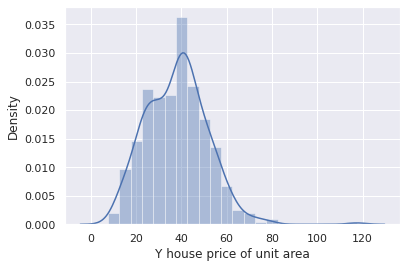

In [9]:
sns.distplot(data['Y house price of unit area'])

In [10]:
q = data["Y house price of unit area"].quantile(0.99)
data_1 = data[data['Y house price of unit area']<q]
data_1.describe(include='all')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,2013.147127,17.725183,1093.850998,4.068460,24.968952,121.533273,37.421516
std,0.281830,11.314879,1266.559410,2.936452,0.012462,0.015409,12.565902
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.100000,289.324800,1.000000,24.962990,121.527600,27.300000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.300000
75%,2013.417000,28.000000,1455.798000,6.000000,24.977950,121.543290,46.100000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,70.100000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

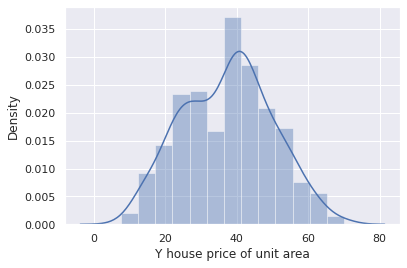

In [11]:
sns.distplot(data_1['Y house price of unit area'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Density'>

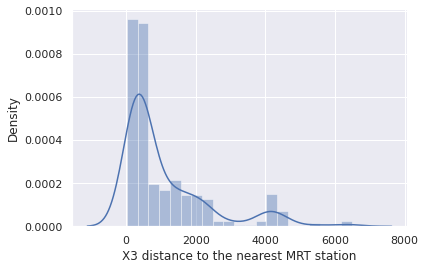

In [12]:
sns.distplot(data_1['X3 distance to the nearest MRT station'])

In [13]:
q= data_1['X3 distance to the nearest MRT station'].quantile(0.99)
data_2 = data_1[data_1['X3 distance to the nearest MRT station']<q]
data_2.describe(include='all')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,2013.145649,17.624010,1032.600310,4.106436,24.969161,121.533940,37.700000
std,0.281339,11.323341,1146.323406,2.934531,0.012383,0.014268,12.385315
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.495070,7.600000
25%,2012.917000,8.975000,289.324800,1.000000,24.963050,121.529728,28.000000
50%,2013.167000,16.050000,492.231300,4.000000,24.971100,121.538675,38.450000
75%,2013.417000,27.525000,1440.755750,6.000000,24.978200,121.543352,46.250000
max,2013.583000,43.800000,4605.749000,10.000000,25.014590,121.566270,70.100000


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Density'>

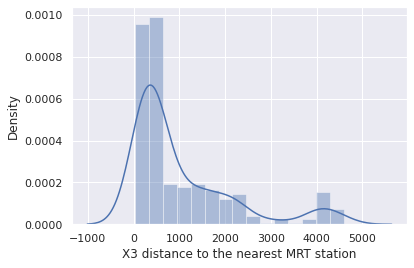

In [14]:
sns.distplot(data_2['X3 distance to the nearest MRT station'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Density'>

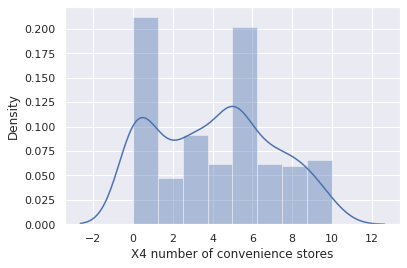

In [15]:
sns.distplot(data_2['X4 number of convenience stores'])

In [16]:
data_cleaned = data_2.reset_index(drop=True)
data_cleaned.describe(include='all')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,2013.145649,17.624010,1032.600310,4.106436,24.969161,121.533940,37.700000
std,0.281339,11.323341,1146.323406,2.934531,0.012383,0.014268,12.385315
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.495070,7.600000
25%,2012.917000,8.975000,289.324800,1.000000,24.963050,121.529728,28.000000
50%,2013.167000,16.050000,492.231300,4.000000,24.971100,121.538675,38.450000
75%,2013.417000,27.525000,1440.755750,6.000000,24.978200,121.543352,46.250000
max,2013.583000,43.800000,4605.749000,10.000000,25.014590,121.566270,70.100000


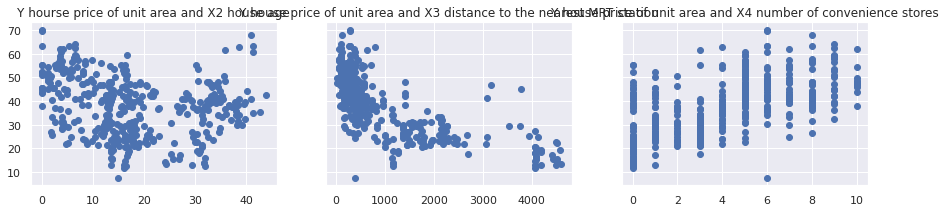

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['X2 house age'],data_cleaned['Y house price of unit area'])
ax1.set_title('Y hourse price of unit area and X2 house age')
ax2.scatter(data_cleaned['X3 distance to the nearest MRT station'],data_cleaned['Y house price of unit area'])
ax2.set_title('Y house price of unit area and X3 distance to the nearest MRT station')
ax3.scatter(data_cleaned['X4 number of convenience stores'],data_cleaned['Y house price of unit area'])
ax3.set_title('Y house price of unit area and X4 number of convenience stores')


plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

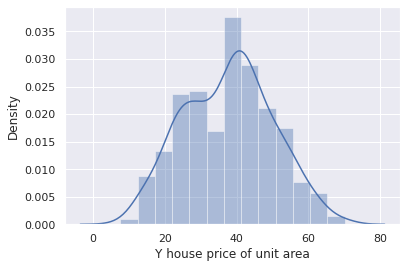

In [18]:
sns.distplot(data_cleaned['Y house price of unit area'])

In [19]:
log_price = np.log(data_cleaned['Y house price of unit area'])

data_cleaned["log_price"] = log_price

data_cleaned

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,log_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,3.634951
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3.742420
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,3.856510
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,4.003690
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3.763523
...,...,...,...,...,...,...,...,...
399,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,2.734368
400,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,3.912023
401,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,3.703768
402,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,3.960813


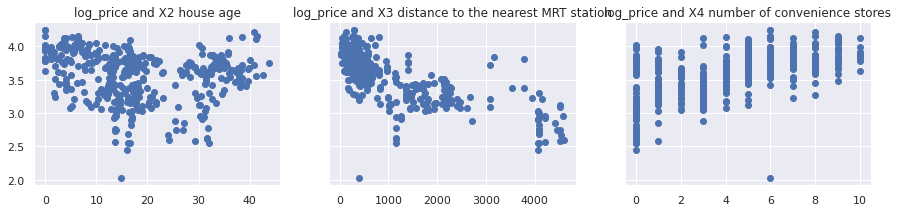

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) 
ax1.scatter(data_cleaned['X2 house age'],data_cleaned['log_price'])
ax1.set_title('log_price and X2 house age')
ax2.scatter(data_cleaned['X3 distance to the nearest MRT station'],data_cleaned['log_price'])
ax2.set_title('log_price and X3 distance to the nearest MRT station')
ax3.scatter(data_cleaned['X4 number of convenience stores'],data_cleaned['log_price'])
ax3.set_title('log_price and X4 number of convenience stores')


plt.show()

In [21]:
data_cleaned = data_cleaned.drop(['Y house price of unit area'],axis=1)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [23]:
vif

,VIF,Features
0,2.746935,X2 house age
1,1.514410,X3 distance to the nearest MRT station
2,2.042727,X4 number of convenience stores


In [24]:
targets = data_cleaned['log_price']
inputs = data_cleaned.drop(['log_price'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

In [26]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

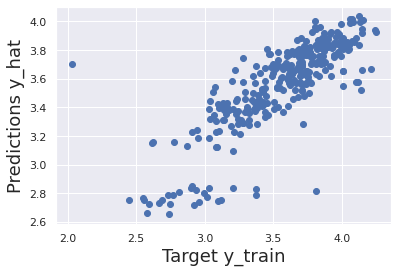

In [27]:
y_hat = reg.predict(x_train)
plt.scatter(y_train,y_hat)

plt.xlabel('Target y_train', size=18)
plt.ylabel('Predictions y_hat', size=18)

plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

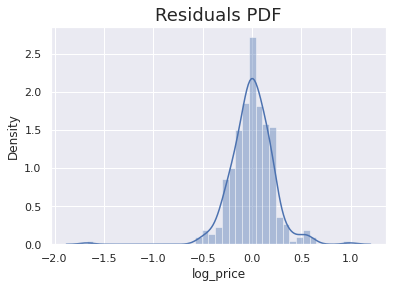

In [28]:
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [29]:
reg.score(x_train,y_train)

0.6671423608230223

In [30]:
reg.intercept_

-556.0722738594019

In [31]:
reg.coef_

array([ 1.21403676e-01, -6.55550683e-03, -1.41705479e-04,  2.91885510e-02,
        7.45059684e+00,  1.06424760e+00])

In [32]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary["Weights"]= reg.coef_
reg_summary

,Features,Weights
0,X1 transaction date,0.121404
1,X2 house age,-0.006556
2,X3 distance to the nearest MRT station,-0.000142
3,X4 number of convenience stores,0.029189
4,X5 latitude,7.450597
5,X6 longitude,1.064248


In [33]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary["Weights"]= reg.coef_
reg_summary

,Features,Weights
0,X1 transaction date,0.121404
1,X2 house age,-0.006556
2,X3 distance to the nearest MRT station,-0.000142
3,X4 number of convenience stores,0.029189
4,X5 latitude,7.450597
5,X6 longitude,1.064248


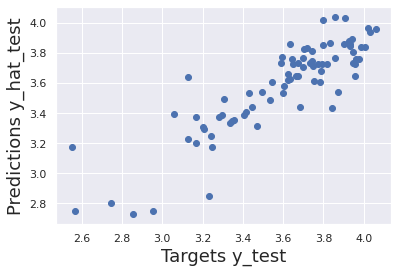

In [34]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets y_test',size=18)
plt.ylabel('Predictions y_hat_test', size=18)
plt.show()

In [35]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,41.819532
1,32.974666
2,34.330547
3,43.696344
4,43.387415


In [36]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,41.819532,37.9
1,32.974666,NaN
2,34.330547,NaN
3,43.696344,NaN
4,43.387415,NaN
...,...,...
76,23.887992,25.6
77,31.032037,NaN
78,38.325593,NaN
79,52.365828,40.3


In [37]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0    3.945458
1    3.306887
2    3.430756
3    3.591818
4    3.858622
Name: log_price, dtype: float64

In [38]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,41.819532,51.7
1,32.974666,27.3
2,34.330547,30.9
3,43.696344,36.3
4,43.387415,47.4
...,...,...
76,23.887992,25.7
77,31.032037,46.6
78,38.325593,52.2
79,52.365828,58.0


In [39]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,41.819532,51.7,9.880468,19.111156
1,32.974666,27.3,-5.674666,20.786323
2,34.330547,30.9,-3.430547,11.102094
3,43.696344,36.3,-7.396344,20.375604
4,43.387415,47.4,4.012585,8.465370
...,...,...,...,...
76,23.887992,25.7,1.812008,7.050617
77,31.032037,46.6,15.567963,33.407646
78,38.325593,52.2,13.874407,26.579325
79,52.365828,58.0,5.634172,9.714089


In [40]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
59,42.33,42.30,-0.03,0.06
17,28.42,28.40,-0.02,0.07
24,41.85,41.90,0.05,0.11
5,37.44,37.40,-0.04,0.11
35,28.67,28.60,-0.07,0.24
38,28.01,28.10,0.09,0.30
63,25.71,25.60,-0.11,0.41
27,31.17,31.30,0.13,0.43
57,37.60,37.80,0.20,0.53
23,40.67,40.30,-0.37,0.91
